In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import os

In [4]:
df = pd.read_csv('D:/Data Science/Assignment/04Simple liner regration/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
#check data type
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
#find the missing value
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

### There is no missing value so no need of imputation

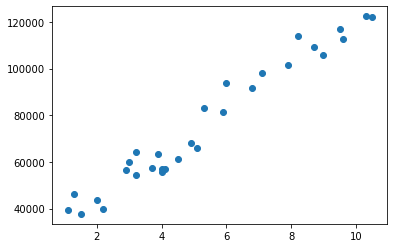

In [10]:
#data visulization
plt.scatter(df['YearsExperience'],df['Salary'])

In [11]:
#check the corelation
df.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### here the variable are highly associated and in between relation is linear so we can apply the linear regrassion

In [12]:
import statsmodels.formula.api as smf

In [15]:
model = smf.ols('Salary~YearsExperience',df).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.14e-20
Time:                        11:02:02   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

C:\Users\PRATIK TRIVEDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

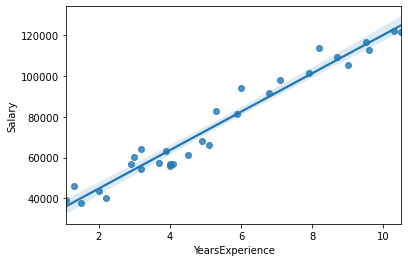

In [23]:
sns.regplot(df['YearsExperience'],df['Salary'])

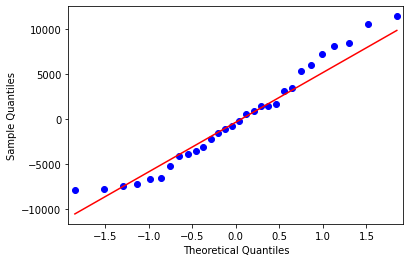

In [27]:
qq = sm.qqplot(model.resid,line='q')

In [36]:
new_data=pd.Series([2.5,3.5])
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])

In [37]:
model.predict(data_pred)

0    49417.106002
1    58867.068324
dtype: float64

In [24]:
model.rsquared

0.9569566641435086